In [29]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np


In [2]:
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
df = pd.read_csv(url) 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
3: 0,
4: 1,
5: 2,
6: 3,
7: 4,
8: 5
}

# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

When we look at this data and consider it a classification problem, a lot of
algorithms come to our mind that we can apply to it, probably, we can use neural
networks. But it would be a bit of a stretch if we dive into neural networks from the
beginning. So, let’s start with something simple that we can visualize too: decision
trees.

Before we begin to understand what overfitting is, let’s divide the data into two
parts. This dataset has 1599 samples. We keep 1000 samples for training and 599
as a separate set.

Splitting can be done easily by the following chunk of code:

In [4]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

We will now train a decision tree model on the training set. For the decision tree model, I am going to use scikit-learn.

In [5]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)


DecisionTreeClassifier(max_depth=3)

Note that I have used a max_depth of 3 for the decision tree classifier. I have left all other parameters of this model to its default value.
Now, we test the accuracy of this model on the training set and the test set:

In [6]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

test_predictions = clf.predict(df_test[cols])


In [7]:
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
print(f'train acc: {train_accuracy}')
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print(f'test acc: {test_accuracy}')


train acc: 0.6
test acc: 0.5442404006677797


Now we increase the max_depth to 7 and repeat the process. 

In [8]:
# train the model on the provided features
# and mapped quality from before
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(df_train[cols], df_train.quality)
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
print(f'train acc: {train_accuracy}')
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print(f'test acc: {test_accuracy}')

train acc: 0.793
test acc: 0.6076794657762938


Training accuracy and test accuracy increased. Here, we have used accuracy, mainly because it is the most straightforward metric. It might not be the best metric for this problem. What about we calculate these accuracies for different values of max_depth and make a plot?

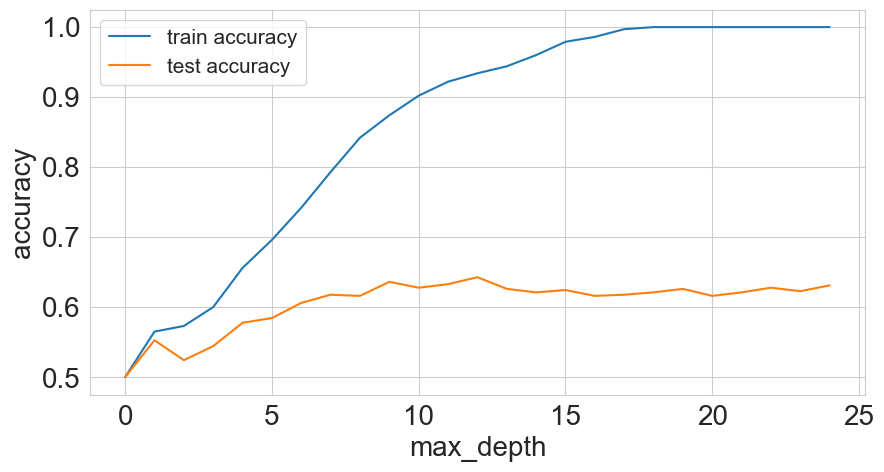

In [9]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

We see that the best score for test data is obtained when max_depth has a value of 14. As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all. This is called overfitting.

The model fits perfectly on the training set and performs poorly when it comes to the test set. This means that the model will learn the training data well but will not generalize on unseen samples. In the dataset above, one can build a model with very high max_depth which will have outstanding results on training data, but that kind of model is not useful as it will not provide a similar result on the real-world samples or live data.


hold-out set => We use this kind of (cross-) validation when we have a large amount of data and model inference is a time-consuming process.

Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets. However, there are a few types of cross-validation techniques which are the most popular and widely used.

These include:
* k-fold cross-validation
* stratified k-fold cross-validation
* hold-out based validation
* leave-one-out cross-validation
* group k-fold cross-validation

In [10]:
# Lets us save our data into  (df_train from prev cells)
df_train.to_csv("train.csv")

In [11]:
## Kfold

import pandas as pd
from sklearn import model_selection


# Training data is in a CSV file called train.csv
tmp = pd.read_csv("train.csv")

# we create a new column called kfold and fill it with -1
tmp["kfold"] = -1

# the next step is to randomize the rows of the data
tmp = tmp.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=tmp)):
    tmp.loc[val_, 'kfold'] = fold

# save the new csv with kfold column
tmp.to_csv("train_folds.csv", index=False)

But above split could be a problem as data set may be skewed. By random sampling one may end up in missing one of the classes completely from the train dataset when its proportion is small.

To overcome this problem we use stratified sampling model_selection.KFold => model_selection.StratifiedKFold

In [12]:
tmp = pd.read_csv("train.csv")
tmp

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.2,1.000,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.00,3
1,1,7.9,0.370,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.30,2
2,2,7.6,0.510,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.20,3
3,3,10.6,0.420,0.48,2.7,0.065,5.0,18.0,0.99720,3.21,0.87,11.30,3
4,4,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,6.9,0.480,0.20,1.9,0.082,9.0,23.0,0.99585,3.39,0.43,9.05,1
996,996,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.60,2
997,997,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,3
998,998,9.1,0.660,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.60,2


In [13]:
# Training data is in a CSV file called train.csv
tmp = pd.read_csv("train.csv")

# we create a new column called kfold and fill it with -1
tmp["kfold"] = -1

# the next step is to randomize the rows of the data
tmp = tmp.sample(frac=1).reset_index(drop=True)

# fetch targets
y = tmp.quality.values

# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
for fold, (t_, v_) in enumerate(kf.split(X=tmp, y=y)):
    tmp.loc[v_, 'kfold'] = fold

# save the new csv with kfold column
tmp.to_csv("train_folds.csv", index=False)

Text(0, 0.5, 'count')

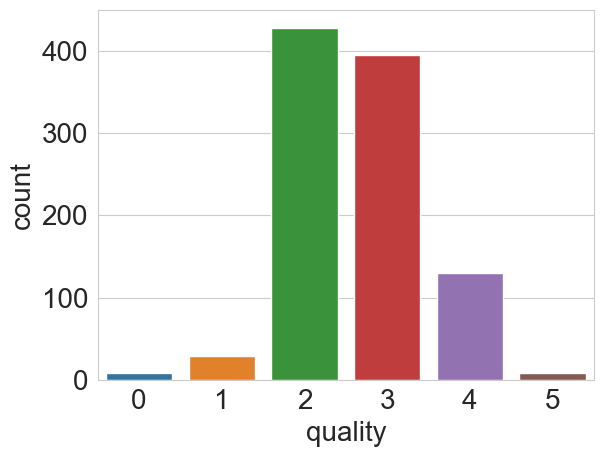

In [14]:
b = sns.countplot(x='quality', data=tmp)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

***Not in book but my trial***
Let us do above problem using stratified sampling, where we will train model using (k-1) folds and test on one fold. Doing this we can get average accuracy score for each

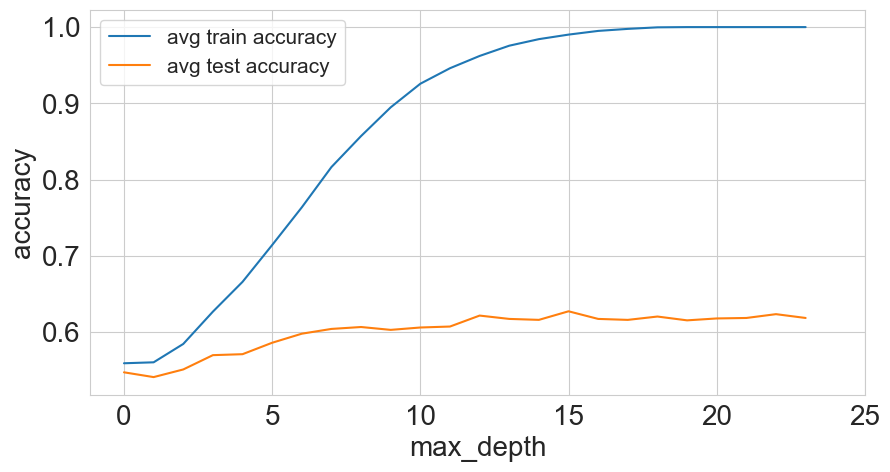

In [33]:
from sklearn import model_selection
    
def create_folds(data, n_splits=5):
    # we create a new column called kfold and fill it with -1
    data["kfold"] = -1
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits)
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=data)):
        data.loc[val_, 'kfold'] = fold
    return data


data = create_folds(df)

avg_test_accuracies=[]
avg_train_accuracies=[]
for depth in range(1, 25):
    train_accuracies = []
    test_accuracies = []
    for fold in data.kfold.unique():
        train_dat = data.loc[data.kfold != fold,]
        test_dat = data.loc[data.kfold == fold,]
        # init the model
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        # fit the model on given features
        clf.fit(train_dat[cols], train_dat.quality)
        # create training & test predictions
        train_predictions = clf.predict(train_dat[cols])
        test_predictions = clf.predict(test_dat[cols])
        # calculate training & test accuracies
        train_accuracy = metrics.accuracy_score(train_dat.quality, train_predictions)
        test_accuracy = metrics.accuracy_score(test_dat.quality, test_predictions)
        # append accuracies
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    avg_test_accuracies.append(np.mean(test_accuracies))
    avg_train_accuracies.append(np.mean(train_accuracies))
    
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(avg_train_accuracies, label="avg train accuracy")
plt.plot(avg_test_accuracies, label="avg test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()